In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

In [5]:
train_data = pd.read_csv("../dataset/goodreads_train.csv", sep=",")
test_data = pd.read_csv("../dataset/goodreads_test.csv", sep=",")

In [6]:
lenght = train_data['review_text'].apply(lambda x: len(x.split()))

In [7]:
lenght

0         368
1          10
2         468
3          19
4         736
         ... 
899995     99
899996    101
899997    335
899998    239
899999    163
Name: review_text, Length: 900000, dtype: int64

In [10]:
lenght[lenght < 200]

1          10
3          19
6          38
7          15
13          4
         ... 
899959      4
899970    169
899995     99
899996    101
899999    163
Name: review_text, Length: 603397, dtype: int64

<AxesSubplot: >

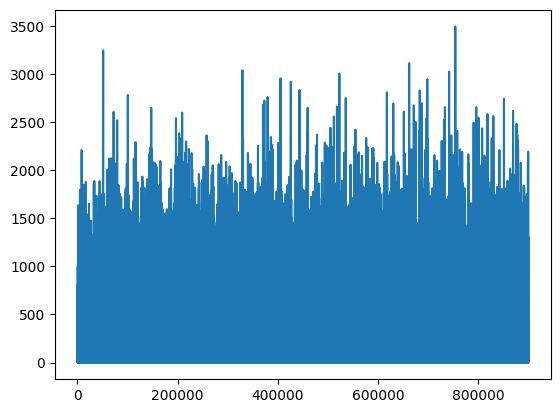

In [4]:
lenght.plot()

In [8]:
train_data["review_text"][0]

'This is a special book. It started slow for about the first third, then in the middle third it started to get interesting, then the last third blew my mind. This is what I love about good science fiction - it pushes your thinking about where things can go. \n It is a 2015 Hugo winner, and translated from its original Chinese, which made it interesting in just a different way from most things I\'ve read. For instance the intermixing of Chinese revolutionary history - how they kept accusing people of being "reactionaries", etc. \n It is a book about science, and aliens. The science described in the book is impressive - its a book grounded in physics and pretty accurate as far as I could tell. (view spoiler)[Though when it got to folding protons into 8 dimensions I think he was just making stuff up - interesting to think about though. \n But what would happen if our SETI stations received a message - if we found someone was out there - and the person monitoring and answering the signal o

In [6]:
test_data

,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,b9450d1c1f97f891c392b1105959b56e,7092507,5c4df7e70e9b438c761f07a4620ccb7c,** spoiler alert ** \n This is definitely one ...,Sat Nov 10 06:06:13 -0800 2012,Sun Nov 11 05:38:36 -0800 2012,Sun Nov 11 05:38:36 -0800 2012,Sat Nov 10 00:00:00 -0800 2012,1,0
1,b9450d1c1f97f891c392b1105959b56e,5576654,8eaeaf13213eeb16ad879a2a2591bbe5,"** spoiler alert ** \n ""You are what you drink...",Fri Nov 09 21:55:16 -0800 2012,Sat Nov 10 05:41:49 -0800 2012,Sat Nov 10 05:41:49 -0800 2012,Fri Nov 09 00:00:00 -0800 2012,1,0
2,b9450d1c1f97f891c392b1105959b56e,15754052,dce649b733c153ba5363a0413cac988f,Roar is one of my favorite characters in Under...,Fri Nov 09 00:25:50 -0800 2012,Sat Nov 10 06:14:10 -0800 2012,Sat Nov 10 06:14:10 -0800 2012,Fri Nov 09 00:00:00 -0800 2012,0,0
3,b9450d1c1f97f891c392b1105959b56e,17020,8a46df0bb997269d6834f9437a4b0a77,** spoiler alert ** \n If you feel like travel...,Thu Nov 01 00:28:39 -0700 2012,Sat Nov 03 11:35:22 -0700 2012,Sat Nov 03 11:35:22 -0700 2012,Thu Nov 01 00:00:00 -0700 2012,0,0
4,b9450d1c1f97f891c392b1105959b56e,12551082,d11d3091e22f1cf3cb865598de197599,3.5 stars \n I read and enjoyed the first two ...,Thu Oct 18 00:57:00 -0700 2012,Mon Apr 01 23:00:51 -0700 2013,Sat Mar 30 00:00:00 -0700 2013,Fri Mar 29 00:00:00 -0700 2013,0,0
...,...,...,...,...,...,...,...,...,...,...
478028,35cef391b171b4fca45771e508028212,15745950,0e1db3d4b04256f9660f5d276ddf1314,Can't wait for Travis' POV \n Travis Before Ab...,Sun Aug 05 10:26:12 -0700 2012,Tue Apr 16 17:24:00 -0700 2013,Tue Apr 16 00:00:00 -0700 2013,NaN,0,0
478029,35cef391b171b4fca45771e508028212,10861195,0b7f352e58caf0fd1f961e98ef04e89c,Had this on my to-read shelf forever. Will upd...,Tue Jul 10 23:31:00 -0700 2012,Fri Dec 28 20:05:51 -0800 2012,NaN,NaN,0,0
478030,35cef391b171b4fca45771e508028212,6131164,9b19eff33ddb14e9e68fca2e90379e46,The last book left me wanting for more. I need...,Tue Jul 10 19:45:17 -0700 2012,Mon Mar 25 18:41:51 -0700 2013,Tue Mar 19 00:00:00 -0700 2013,NaN,0,0
478031,35cef391b171b4fca45771e508028212,10025305,8be463fed78f0da63e964706f710332b,Things are heating up in the second novel of I...,Thu Jul 05 19:19:30 -0700 2012,Thu Jan 24 16:24:54 -0800 2013,Mon Jan 14 00:00:00 -0800 2013,NaN,0,0
